# Reinforcement Learning Agent Development for CartPole

This notebook demonstrates how to train, evaluate, and visualize the performance of an RL agent on the CartPole-v1 environment using Stable-Baselines3.

In [ ]:
pip install gym==0.26.2

In [ ]:
pip install stable-baselines3==1.6.0

In [ ]:
pip install torch>=2.0.0

In [ ]:
pip install matplotlib==3.6.2

In [ ]:
pip install numpy==1.24.3

## Training the Agent

In [1]:
import gym
from stable_baselines3 import PPO
import os

# Create the environment
env = gym.make('CartPole-v1')

# Create the PPO model
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log='./ppo_cartpole_tensorboard/')

# Train the model
model.learn(total_timesteps=50000)

# Save the model
os.makedirs('models', exist_ok=True)
model.save('models/cartpole_ppo.zip')
print('Model saved to models/cartpole_ppo.zip')

c:\users\moham\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_cartpole_tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    fps             | 1722     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.4        |
|    ep_rew_mean          | 26.4        |
| time/                   |             |
|    fps                  | 1159        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008563191 |
|    clip_fraction        | 0.1         |
|    clip_range   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 160          |
|    ep_rew_mean          | 160          |
| time/                   |              |
|    fps                  | 909          |
|    iterations           | 11           |
|    time_elapsed         | 24           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0031550482 |
|    clip_fraction        | 0.0226       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.559       |
|    explained_variance   | 0.872        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.93         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00305     |
|    value_loss           | 22.2         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 334          |
|    ep_rew_mean          | 334          |
| time/                   |              |
|    fps                  | 907          |
|    iterations           | 21           |
|    time_elapsed         | 47           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0030575395 |
|    clip_fraction        | 0.0241       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.508       |
|    explained_variance   | -0.226       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0211       |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 0.129        |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

## Evaluating the Agent

In [2]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

c:\users\moham\appdata\local\programs\python\python39\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 500.00 +/- 0.00


## Visualizing the Agent's Performance

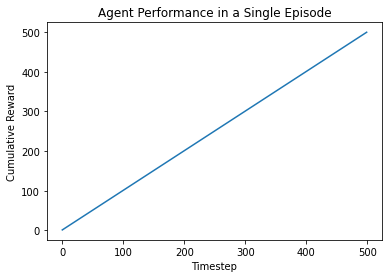

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Run one episode and record rewards
obs = env.reset()
done = False
rewards = []
while not done:
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.title('Agent Performance in a Single Episode')
plt.show()

## Conclusion

In this notebook, we trained a PPO agent on the CartPole-v1 environment, evaluated its performance, and visualized the results. This project demonstrates basic RL techniques and can be extended to more complex environments and algorithms.